# Import Libraries

In [1]:
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import skew
from scipy.stats import norm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer


# Read the csv file

In [2]:
path=r'C:\Users\megha\Documents\Projects\House Price prediction\train.csv'
train=pd.read_csv(path,index_col='Id')
train.columns
y=train['SalePrice']

In [3]:
y

Id
1       208500
2       181500
3       223500
4       140000
5       250000
6       143000
7       307000
8       200000
9       129900
10      118000
11      129500
12      345000
13      144000
14      279500
15      157000
16      132000
17      149000
18       90000
19      159000
20      139000
21      325300
22      139400
23      230000
24      129900
25      154000
26      256300
27      134800
28      306000
29      207500
30       68500
         ...  
1431    192140
1432    143750
1433     64500
1434    186500
1435    160000
1436    174000
1437    120500
1438    394617
1439    149700
1440    197000
1441    191000
1442    149300
1443    310000
1444    121000
1445    179600
1446    129000
1447    157900
1448    240000
1449    112000
1450     92000
1451    136000
1452    287090
1453    145000
1454     84500
1455    185000
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [4]:
print(train.shape,y.shape)

(1460, 80) (1460,)


# Exploring SalePrice

In [5]:
#descriptive statistics
#y.describe() #there are no 0 minimum price, data is valid.

In [6]:
 #histogram (distribution plot) and normal probability plot
#sns.distplot(y, fit=norm);
#fig = plt.figure()
#res = stats.probplot(y, plot=plt)

In [7]:
# Log transform the target 
y = np.log1p(y)

In [8]:
y

Id
1       12.247699
2       12.109016
3       12.317171
4       11.849405
5       12.429220
6       11.870607
7       12.634606
8       12.206078
9       11.774528
10      11.678448
11      11.771444
12      12.751303
13      11.877576
14      12.540761
15      11.964007
16      11.790565
17      11.911708
18      11.407576
19      11.976666
20      11.842236
21      12.692506
22      11.845110
23      12.345839
24      11.774528
25      11.944714
26      12.454108
27      11.811555
28      12.631344
29      12.242891
30      11.134604
          ...    
1431    12.165985
1432    11.875838
1433    11.074436
1434    12.136192
1435    11.982935
1436    12.066816
1437    11.699413
1438    12.885673
1439    11.916395
1440    12.190964
1441    12.160034
1442    11.913720
1443    12.644331
1444    11.703554
1445    12.098493
1446    11.767575
1447    11.969724
1448    12.388398
1449    11.626263
1450    11.429555
1451    11.820418
1452    12.567555
1453    11.884496
1454    11.344519
1455   

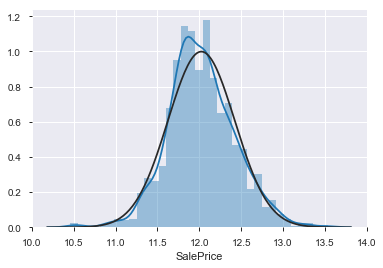

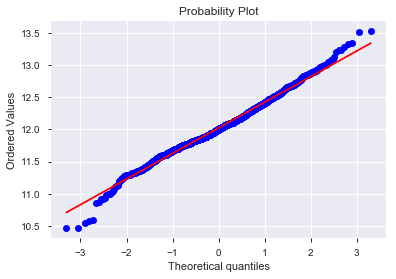

In [9]:
sns.distplot(y, fit=norm);
fig = plt.figure()
res = stats.probplot(y, plot=plt)
#plot after log transform

# Data cleaning : Removing outliers as per paper

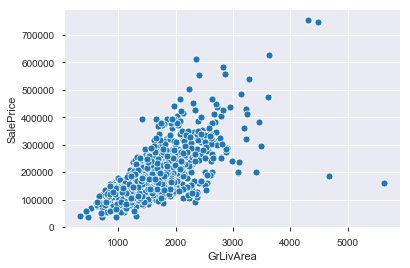

In [10]:
#Following the paper to mark outliers
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train) 

In [11]:
train.loc[(train['SalePrice']< 200000) & (train['GrLivArea']>4000) ] #view the 2 extreme outliers

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [12]:
train=train.drop([524,1299]) #remove the 2 extreme data points

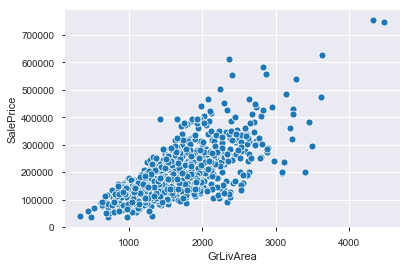

In [13]:
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train) #the new data

In [14]:
y=np.log1p(train['SalePrice'])
#adding test data to remove features effectively in both train and test data
path_test=r'C:\Users\megha\Documents\Projects\House Price prediction\test.csv'
test_data=pd.read_csv(path_test,index_col='Id')
train_data=train.drop('SalePrice',axis=1)

data=pd.concat([train_data,test_data],sort=False)
data.columns

#shape of data, to effectively spilt after feture engineering
mtrain = train.shape[0]
mtest = test_data.shape[0]

In [15]:
data.shape#checking the dimensions of the data

(2917, 79)

# Data Cleaning: Filling missing values, new features and dropping features

In [16]:
# Handle missing values for features where median/mean or most common value doesn't make sense

# Alley : data description says NA means "no alley access"
data.loc[:, "Alley"] = data.loc[:, "Alley"].fillna("None")
# BedroomAbvGr : NA most likely means 0
data.loc[:, "BedroomAbvGr"] = data.loc[:, "BedroomAbvGr"].fillna(0)
# BsmtQual etc : data description says NA for basement features is "no basement"
data.loc[:, "BsmtQual"] = data.loc[:, "BsmtQual"].fillna("No")
data.loc[:, "BsmtCond"] = data.loc[:, "BsmtCond"].fillna("No")
data.loc[:, "BsmtExposure"] = data.loc[:, "BsmtExposure"].fillna("No")
data.loc[:, "BsmtFinType1"] = data.loc[:, "BsmtFinType1"].fillna("No")
data.loc[:, "BsmtFinType2"] = data.loc[:, "BsmtFinType2"].fillna("No")
data.loc[:, "BsmtFullBath"] = data.loc[:, "BsmtFullBath"].fillna(0)
data.loc[:, "BsmtHalfBath"] = data.loc[:, "BsmtHalfBath"].fillna(0)
data.loc[:, "BsmtUnfSF"] = data.loc[:, "BsmtUnfSF"].fillna(0)
# CentralAir : NA most likely means No
data.loc[:, "CentralAir"] = data.loc[:, "CentralAir"].fillna("N")
# Condition : NA most likely means Normal
data.loc[:, "Condition1"] = data.loc[:, "Condition1"].fillna("Norm")
data.loc[:, "Condition2"] = data.loc[:, "Condition2"].fillna("Norm")
# EnclosedPorch : NA most likely means no enclosed porch
data.loc[:, "EnclosedPorch"] = data.loc[:, "EnclosedPorch"].fillna(0)
# External stuff : NA most likely means average
data.loc[:, "ExterCond"] = data.loc[:, "ExterCond"].fillna("TA")
data.loc[:, "ExterQual"] = data.loc[:, "ExterQual"].fillna("TA")
# Fence : data description says NA means "no fence"
data.loc[:, "Fence"] = data.loc[:, "Fence"].fillna("No")
# FireplaceQu : data description says NA means "no fireplace"
data.loc[:, "FireplaceQu"] = data.loc[:, "FireplaceQu"].fillna("No")
data.loc[:, "Fireplaces"] = data.loc[:, "Fireplaces"].fillna(0)
# Functional : data description says NA means typical
data.loc[:, "Functional"] = data.loc[:, "Functional"].fillna("Typ")
# GarageType etc : data description says NA for garage features is "no garage"
data.loc[:, "GarageType"] = data.loc[:, "GarageType"].fillna("No")
data.loc[:, "GarageFinish"] = data.loc[:, "GarageFinish"].fillna("No")
data.loc[:, "GarageQual"] = data.loc[:, "GarageQual"].fillna("No")
data.loc[:, "GarageCond"] = data.loc[:, "GarageCond"].fillna("No")
data.loc[:, "GarageArea"] = data.loc[:, "GarageArea"].fillna(0)
data.loc[:, "GarageCars"] = data.loc[:, "GarageCars"].fillna(0)
# HalfBath : NA most likely means no half baths above grade
data.loc[:, "HalfBath"] = data.loc[:, "HalfBath"].fillna(0)
# HeatingQC : NA most likely means typical
data.loc[:, "HeatingQC"] = data.loc[:, "HeatingQC"].fillna("TA")
# KitchenAbvGr : NA most likely means 0
data.loc[:, "KitchenAbvGr"] = data.loc[:, "KitchenAbvGr"].fillna(0)
# KitchenQual : NA most likely means typical
data.loc[:, "KitchenQual"] = data.loc[:, "KitchenQual"].fillna("TA")
# LotFrontage : NA most likely means no lot frontage
data.loc[:, "LotFrontage"] = data.loc[:, "LotFrontage"].fillna(0)
# LotShape : NA most likely means regular
data.loc[:, "LotShape"] = data.loc[:, "LotShape"].fillna("Reg")
# MasVnrType : NA most likely means no veneer
data.loc[:, "MasVnrType"] = data.loc[:, "MasVnrType"].fillna("None")
data.loc[:, "MasVnrArea"] = data.loc[:, "MasVnrArea"].fillna(0)
# MiscFeature : data description says NA means "no misc feature"
data.loc[:, "MiscFeature"] = data.loc[:, "MiscFeature"].fillna("No")
data.loc[:, "MiscVal"] = data.loc[:, "MiscVal"].fillna(0)
# OpenPorchSF : NA most likely means no open porch
data.loc[:, "OpenPorchSF"] = data.loc[:, "OpenPorchSF"].fillna(0)
# PavedDrive : NA most likely means not paved
data.loc[:, "PavedDrive"] = data.loc[:, "PavedDrive"].fillna("N")
# PoolQC : data description says NA means "no pool"
data.loc[:, "PoolQC"] = data.loc[:, "PoolQC"].fillna("No")
data.loc[:, "PoolArea"] = data.loc[:, "PoolArea"].fillna(0)
# SaleCondition : NA most likely means normal sale
data.loc[:, "SaleCondition"] = data.loc[:, "SaleCondition"].fillna("Normal")
# ScreenPorch : NA most likely means no screen porch
data.loc[:, "ScreenPorch"] = data.loc[:, "ScreenPorch"].fillna(0)
# TotRmsAbvGrd : NA most likely means 0
data.loc[:, "TotRmsAbvGrd"] = data.loc[:, "TotRmsAbvGrd"].fillna(0)
# Utilities : NA most likely means all public utilities
data.loc[:, "Utilities"] = data.loc[:, "Utilities"].fillna("AllPub")
# WoodDeckSF : NA most likely means no wood deck
data.loc[:, "WoodDeckSF"] = data.loc[:, "WoodDeckSF"].fillna(0)

In [17]:
# Some numerical features are actually really categories
data = data.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })

In [18]:
# Encode some categorical features as ordered numbers when there is information in the order
data = data.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )

In [19]:
# Create new features
# 1* Simplifications of existing features
data["SimplOverallQual"] = data.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
data["SimplOverallCond"] = data.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                       4 : 2, 5 : 2, 6 : 2, # average
                                                       7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                      })
data["SimplPoolQC"] = data.PoolQC.replace({1 : 1, 2 : 1, # average
                                             3 : 2, 4 : 2 # good
                                            })
data["SimplGarageCond"] = data.GarageCond.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
data["SimplGarageQual"] = data.GarageQual.replace({1 : 1, # bad
                                                     2 : 1, 3 : 1, # average
                                                     4 : 2, 5 : 2 # good
                                                    })
data["SimplFireplaceQu"] = data.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
data["SimplFireplaceQu"] = data.FireplaceQu.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
data["SimplFunctional"] = data.Functional.replace({1 : 1, 2 : 1, # bad
                                                     3 : 2, 4 : 2, # major
                                                     5 : 3, 6 : 3, 7 : 3, # minor
                                                     8 : 4 # typical
                                                    })
data["SimplKitchenQual"] = data.KitchenQual.replace({1 : 1, # bad
                                                       2 : 1, 3 : 1, # average
                                                       4 : 2, 5 : 2 # good
                                                      })
data["SimplHeatingQC"] = data.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
data["SimplBsmtFinType1"] = data.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
data["SimplBsmtFinType2"] = data.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
data["SimplBsmtCond"] = data.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
data["SimplBsmtQual"] = data.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
data["SimplExterCond"] = data.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
data["SimplExterQual"] = data.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

# 2* Combinations of existing features
# Overall quality of the house
data["OverallGrade"] = data["OverallQual"] * data["OverallCond"]
# Overall quality of the garage
data["GarageGrade"] = data["GarageQual"] * data["GarageCond"]
# Overall quality of the exterior
data["ExterGrade"] = data["ExterQual"] * data["ExterCond"]
# Overall kitchen score
data["KitchenScore"] = data["KitchenAbvGr"] * data["KitchenQual"]
# Overall fireplace score
data["FireplaceScore"] = data["Fireplaces"] * data["FireplaceQu"]
# Overall garage score
data["GarageScore"] = data["GarageArea"] * data["GarageQual"]
# Overall pool score
data["PoolScore"] = data["PoolArea"] * data["PoolQC"]
# Simplified overall quality of the house
data["SimplOverallGrade"] = data["SimplOverallQual"] * data["SimplOverallCond"]
# Simplified overall quality of the exterior
data["SimplExterGrade"] = data["SimplExterQual"] * data["SimplExterCond"]
# Simplified overall pool score
data["SimplPoolScore"] = data["PoolArea"] * data["SimplPoolQC"]
# Simplified overall garage score
data["SimplGarageScore"] = data["GarageArea"] * data["SimplGarageQual"]
# Simplified overall fireplace score
data["SimplFireplaceScore"] = data["Fireplaces"] * data["SimplFireplaceQu"]
# Simplified overall kitchen score
data["SimplKitchenScore"] = data["KitchenAbvGr"] * data["SimplKitchenQual"]
# Total number of bathrooms
data["TotalBath"] = data["BsmtFullBath"] + (0.5 * data["BsmtHalfBath"]) + \
data["FullBath"] + (0.5 * data["HalfBath"])
# Total SF for house (incl. basement)
data["AllSF"] = data["GrLivArea"] + data["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
data["AllFlrsSF"] = data["1stFlrSF"] + data["2ndFlrSF"]
# Total SF for porch
data["AllPorchSF"] = data["OpenPorchSF"] + data["EnclosedPorch"] + \
data["3SsnPorch"] + data["ScreenPorch"]
# Has masonry veneer or not
data["HasMasVnr"] = data.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
data["BoughtOffPlan"] = data.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

In [20]:
# Create new features
# 3* Polynomials on the top 10 existing features
data["OverallQual-s2"] = data["OverallQual"] ** 2
data["OverallQual-s3"] = data["OverallQual"] ** 3
data["OverallQual-Sq"] = np.sqrt(data["OverallQual"])
data["AllSF-2"] = data["AllSF"] ** 2
data["AllSF-3"] = data["AllSF"] ** 3
data["AllSF-Sq"] = np.sqrt(data["AllSF"])
data["AllFlrsSF-2"] = data["AllFlrsSF"] ** 2
data["AllFlrsSF-3"] = data["AllFlrsSF"] ** 3
data["AllFlrsSF-Sq"] = np.sqrt(data["AllFlrsSF"])
data["GrLivArea-2"] = data["GrLivArea"] ** 2
data["GrLivArea-3"] = data["GrLivArea"] ** 3
data["GrLivArea-Sq"] = np.sqrt(data["GrLivArea"])
data["SimplOverallQual-s2"] = data["SimplOverallQual"] ** 2
data["SimplOverallQual-s3"] = data["SimplOverallQual"] ** 3
data["SimplOverallQual-Sq"] = np.sqrt(data["SimplOverallQual"])
data["ExterQual-2"] = data["ExterQual"] ** 2
data["ExterQual-3"] = data["ExterQual"] ** 3
data["ExterQual-Sq"] = np.sqrt(data["ExterQual"])
data["GarageCars-2"] = data["GarageCars"] ** 2
data["GarageCars-3"] = data["GarageCars"] ** 3
data["GarageCars-Sq"] = np.sqrt(data["GarageCars"])
data["TotalBath-2"] = data["TotalBath"] ** 2
data["TotalBath-3"] = data["TotalBath"] ** 3
data["TotalBath-Sq"] = np.sqrt(data["TotalBath"])
data["KitchenQual-2"] = data["KitchenQual"] ** 2
data["KitchenQual-3"] = data["KitchenQual"] ** 3
data["KitchenQual-Sq"] = np.sqrt(data["KitchenQual"])
data["GarageScore-2"] = data["GarageScore"] ** 2
data["GarageScore-3"] = data["GarageScore"] ** 3
data["GarageScore-Sq"] = np.sqrt(data["GarageScore"])

In [21]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = data.select_dtypes(include = ["object"]).columns
numerical_features = data.select_dtypes(exclude = ["object"]).columns
print("Numerical features : " + str(len(numerical_features)))
print("Categorical features : " + str(len(categorical_features)))
data_num = data[numerical_features]
data_cat = data[categorical_features]

Numerical features : 116
Categorical features : 27


In [22]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in data : " + str(data_num.isnull().values.sum()))
data_num = data_num.fillna(data_num.median())
print("Remaining NAs for numerical features in data : " + str(data_num.isnull().values.sum()))

NAs for numerical features in data : 166
Remaining NAs for numerical features in data : 0


In [23]:
# Log transform of the skewed numerical features to lessen impact of outliers
# Inspired by Alexandru Papiu's script : https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models
# As a general rule of thumb, a skewness with an absolute value > 0.5 is considered at least moderately skewed
skewness = data_num.apply(lambda x: skew(x))
skewness = skewness[abs(skewness) > 0.5]
print(str(skewness.shape[0]) + " skewed numerical features to log transform")
skewed_features = skewness.index
data_num[skewed_features] = np.log1p(data_num[skewed_features])

84 skewed numerical features to log transform


In [24]:
# Create dummy features for categorical values via one-hot encoding
print("NAs for categorical features in data : " + str(data_cat.isnull().values.sum()))
data_cat = pd.get_dummies(data_cat)
print("Remaining NAs for categorical features in data : " + str(data_cat.isnull().values.sum()))

NAs for categorical features in data : 8
Remaining NAs for categorical features in data : 0


In [25]:
# Join categorical and numerical features
data = pd.concat([data_num, data_cat], axis = 1)
print("New number of features : " + str(data.shape[1]))

train = data[:mtrain]
test= data[mtrain:]

# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

New number of features : 324
X_train : (1020, 324)
X_test : (438, 324)
y_train : (1020,)
y_test : (438,)


In [26]:
# Standardize numerical features
stdSc = StandardScaler()
X_train.loc[:, numerical_features] = stdSc.fit_transform(X_train.loc[:, numerical_features])
X_test.loc[:, numerical_features] = stdSc.transform(X_test.loc[:, numerical_features])

C:\Users\megha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\megha\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\megha\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\megha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing th

In [27]:
# Define error measure for official scoring : RMSE
from sklearn.model_selection import cross_val_score
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

RMSE on Training set : 0.2784634321598295
RMSE on Test set : 0.34615633029779314


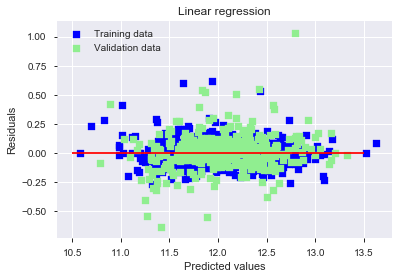

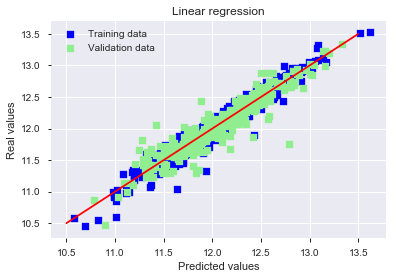

In [28]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Plot residuals
plt.scatter(y_train_pred, y_train_pred - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [29]:
y_train

Id
465     11.728045
1219    11.296025
329     12.276070
603     12.301387
1407    11.798112
986     11.736077
1227    12.273736
864     11.794345
1400    11.831023
659     11.487618
620     12.628070
419     11.744045
901     11.608245
1012    11.512935
1375    12.429220
518     12.487489
1220    11.424105
881     11.964007
860     12.429220
1325    11.898195
1248    12.042971
492     11.798112
580     11.786770
1448    12.388398
1298    11.849405
961     11.665655
1177    11.691080
132     12.404928
16      11.790565
944     11.870607
          ...    
1436    12.066816
1203    11.669938
100     11.767188
852     12.278398
449     11.691080
757     12.264346
978     12.205578
116     12.078245
779     11.877576
73      12.128117
847     12.269052
539     11.970357
851     11.786770
175     12.122696
88      12.010672
553     12.450982
707     12.618186
315     12.089544
1423    11.824087
602     11.856522
1096    12.080696
601     12.524530
278     11.856522
1035    11.693170
1386   